In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np


In [27]:
def make_hello(N=1000,rseed=42):
    fig,ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5,0.4,'YGQ',va='center',ha='center',weight='bold',size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('hello.png')[::-1,:,0].T
    rng = np.random.RandomState(rseed)
    X=rng.rand(4*N,2)
    i,j = (X*data.shape).astype(int).T
    mask = (data[i,j]<1)
    X=X[mask]
    X[:,0]*=(data.shape[0]/data.shape[1])
    X=X[:N]
    return X[np.argsort(X[:,0])]

(0.4345004399248337,
 3.4953524071424953,
 -0.05418110926025213,
 1.0149735574133127)

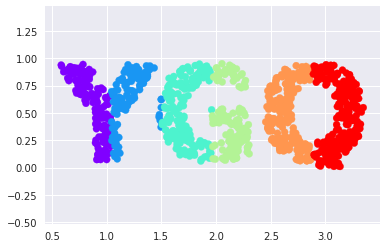

In [28]:
X = make_hello()
colorize = dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',6))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(5.077627385994479, 8.1563354888878, -0.05418110926025213, 1.0149735574133127)

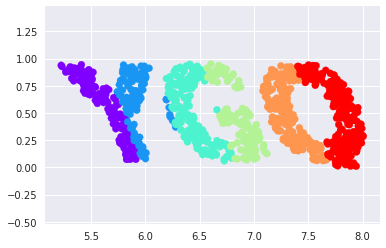

In [29]:
def rotate(X,angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta),np.sin(theta)],
         [-np.sin(theta),np.cos(theta)]]
    return np.dot(X,R)
X2 = rotate(X,20)+5
plt.scatter(X2[:,0],X[:,1],**colorize)
plt.axis('equal')

In [31]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

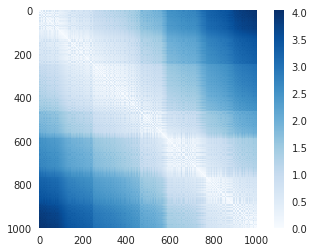

In [20]:
plt.imshow(D,zorder=2,cmap='Blues',interpolation='nearest')
plt.colorbar()

In [32]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)

True

(-1.080763311390693,
 0.9513541896420754,
 -1.4166785009061742,
 1.3214047572621161)

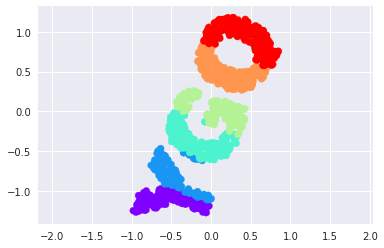

In [45]:
from sklearn.manifold import MDS
model = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out = model.fit_transform(D2)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')

In [35]:
def random_projection(X,dimension=3,rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension,dimension)
    e,V = np.linalg.eigh(np.dot(C,C.T))
    return np.dot(X,V[:X.shape[1]])
X3 = random_projection(X,3)
X3.shape

(1000, 3)

In [36]:
np.linalg.eigh?

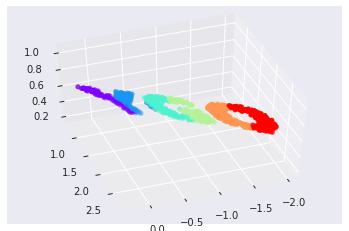

In [37]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],**colorize)
ax.view_init(azim=70,elev=50)

(-1.0807633113906934,
 0.9513541896420868,
 -1.416678500906173,
 1.3214047572621195)

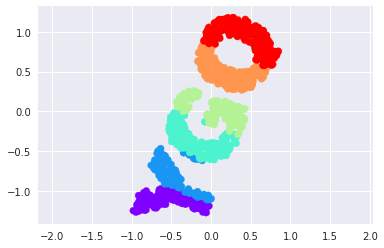

In [41]:
model = MDS(n_components=2,random_state=1)
out3 = model.fit_transform(X)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')

In [42]:
model.fit_transform?